In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

In [2]:
file_path = 'manufacturing_defect_dataset.csv'
data = pd.read_csv(file_path)

data.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ProductionVolume,3240.0,548.523148,262.402073,100.000000,322.000000,549.000000,775.250000,999.000000
ProductionCost,3240.0,12423.018476,4308.051904,5000.174521,8728.829280,12405.204656,16124.462428,19993.365549
SupplierQuality,3240.0,89.833290,5.759143,80.004820,84.869219,89.704861,94.789936,99.989214
DeliveryDelay,3240.0,2.558951,1.705804,0.000000,1.000000,3.000000,4.000000,5.000000
DefectRate,3240.0,2.749116,1.310154,0.500710,1.598033,2.708775,3.904533,4.998529
QualityScore,3240.0,80.134272,11.611750,60.010098,70.103420,80.265312,90.353822,99.996993
MaintenanceHours,3240.0,11.476543,6.872684,0.000000,5.750000,12.000000,17.000000,23.000000
DowntimePercentage,3240.0,2.501373,1.443684,0.001665,1.264597,2.465151,3.774861,4.997591
InventoryTurnover,3240.0,6.019662,2.329791,2.001611,3.983249,6.022389,8.050222,9.998577
StockoutRate,3240.0,0.050878,0.028797,0.000002,0.026200,0.051837,0.075473,0.099997


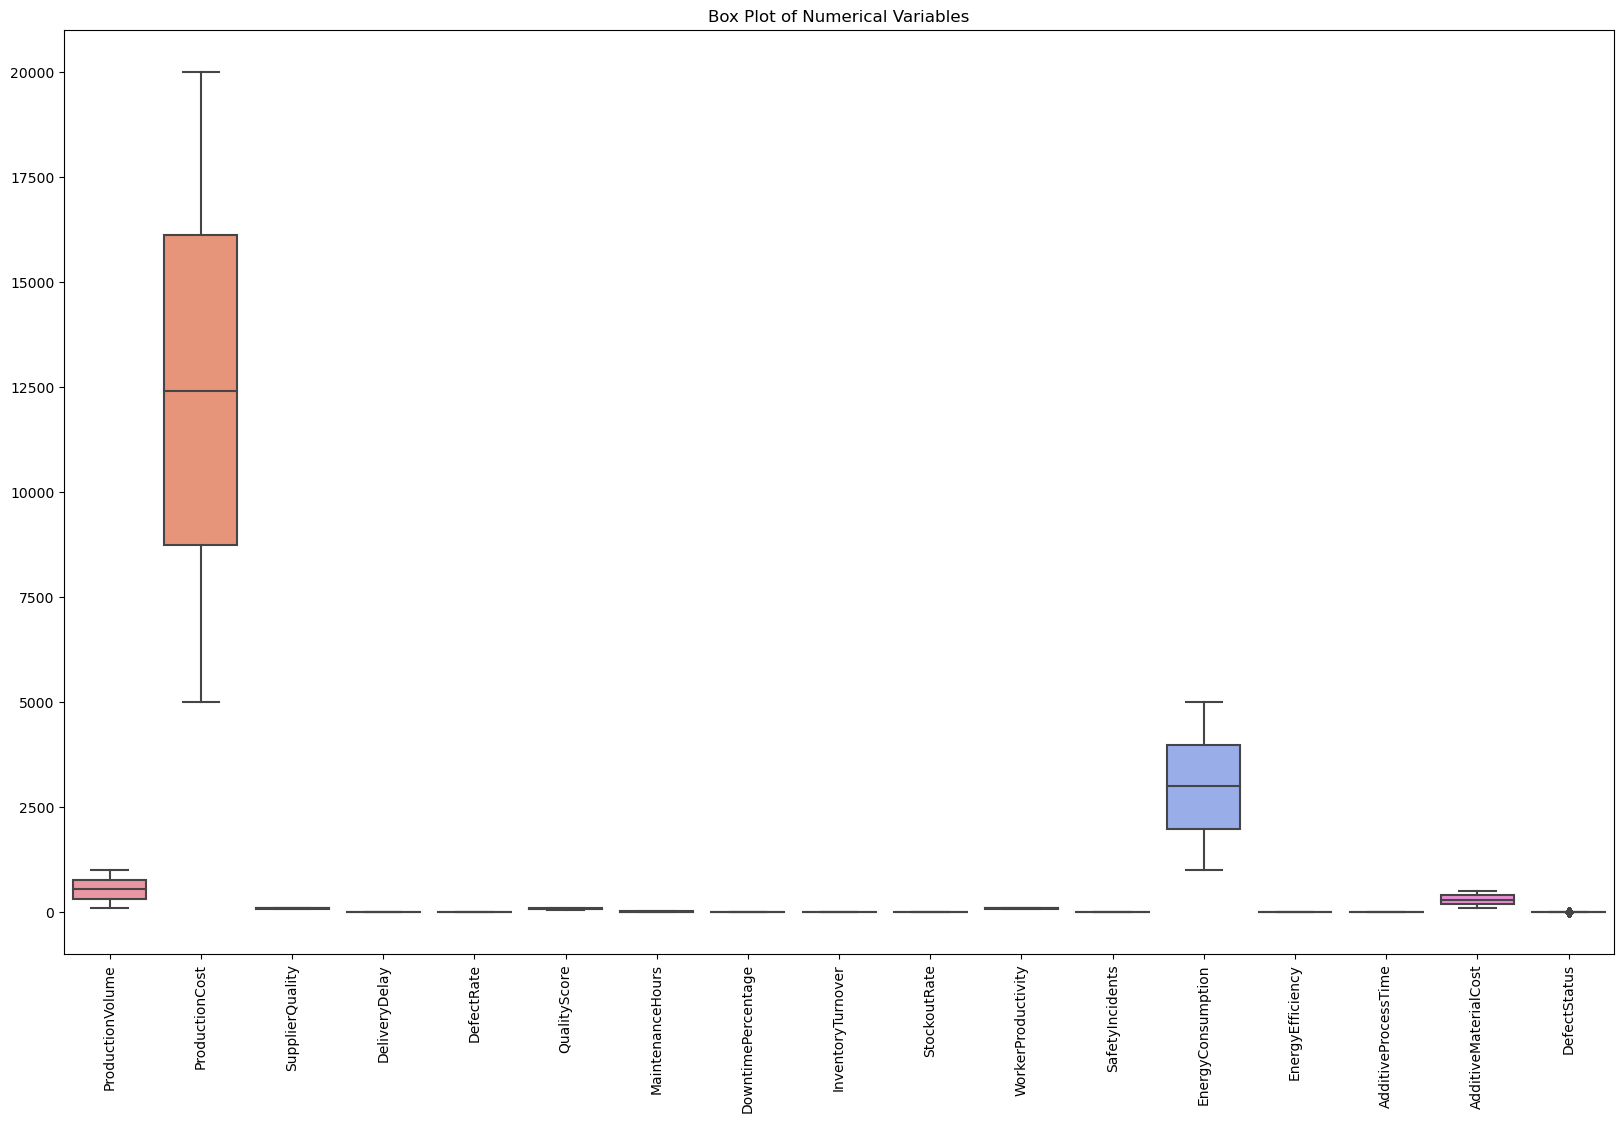

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting box plots for all numerical columns
plt.figure(figsize=(20, 12))
sns.boxplot(data=data.select_dtypes(include=['float64', 'int64']))
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Variables")
plt.show()

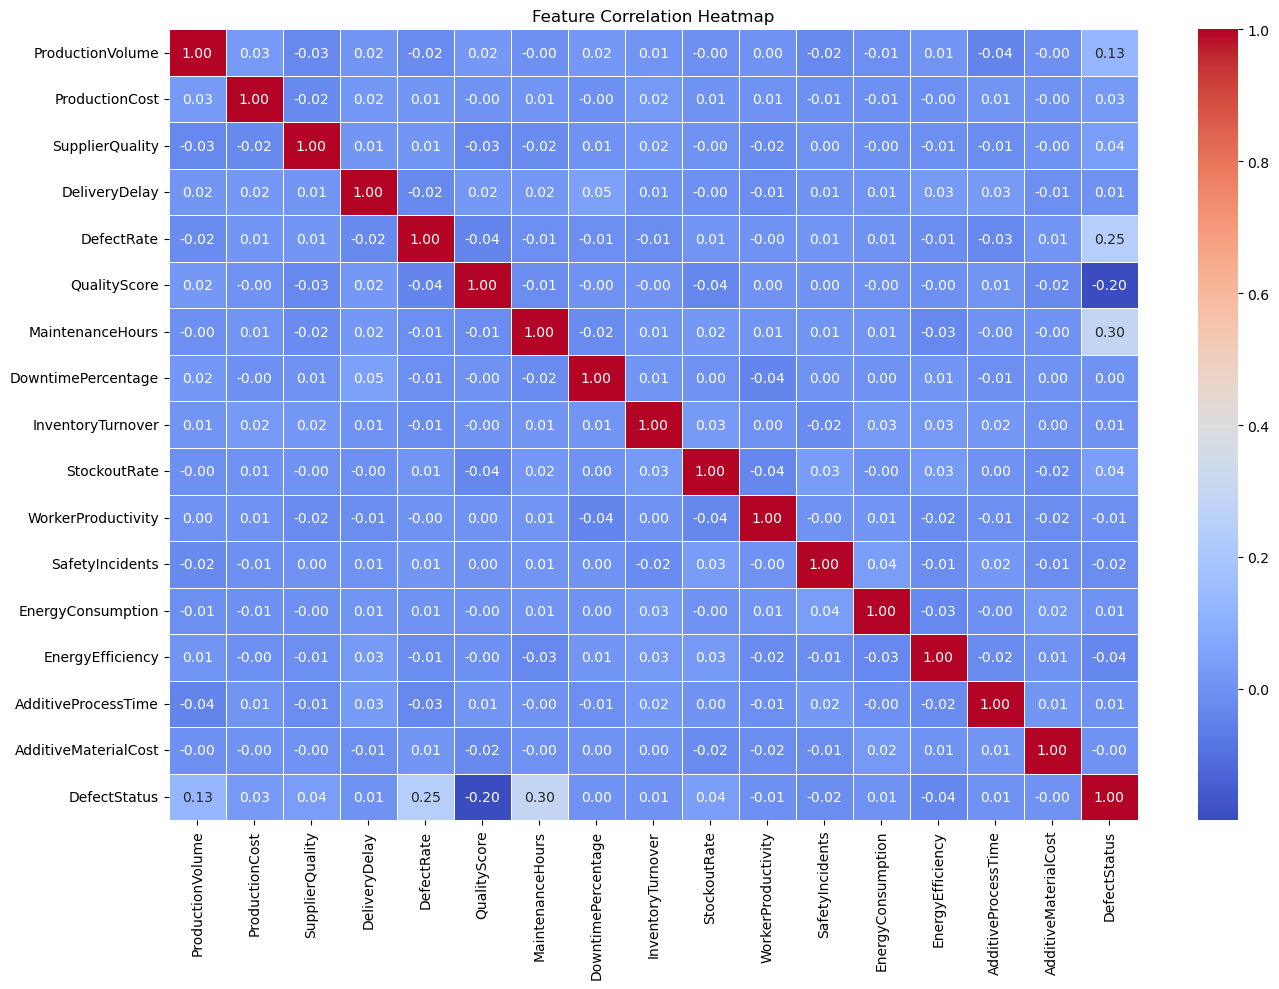

In [6]:
correlation_matrix = data.corr()

# Plotting the heatmap for correlations
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

In [7]:
# Feature importance using correlation for logistic regression and SVM
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['DefectStatus'].drop('DefectStatus').sort_values(key=abs, ascending=False)

# Highlight less important columns (arbitrary threshold: |correlation| < 0.1)
less_important_columns = correlation_with_target[abs(correlation_with_target) < 0.1]
less_important_columns

StockoutRate            0.040574
SupplierQuality         0.038184
EnergyEfficiency       -0.035031
ProductionCost          0.026720
SafetyIncidents        -0.016039
InventoryTurnover       0.006733
AdditiveProcessTime     0.005619
DeliveryDelay           0.005425
WorkerProductivity     -0.005224
EnergyConsumption       0.005039
DowntimePercentage      0.004128
AdditiveMaterialCost   -0.000953
Name: DefectStatus, dtype: float64

In [9]:
# Identify columns with correlation less than |0.1|
low_correlation_columns = less_important_columns.index

# Drop these columns from the dataset
data_reduced = data.drop(columns=low_correlation_columns)

# Display the remaining columns
data_reduced.columns

Index(['ProductionVolume', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DefectStatus'],
      dtype='object')

DefectStatus
1    2723
0     517
Name: count, dtype: int64

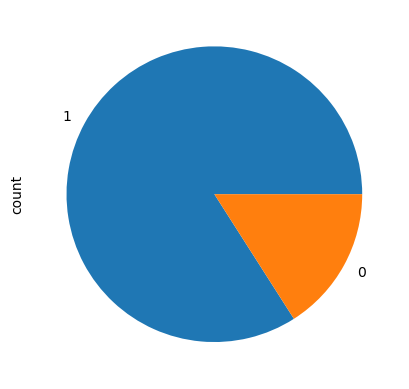

In [16]:
data_reduced['DefectStatus'].value_counts().plot(kind='pie')
data_reduced['DefectStatus'].value_counts()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np

In [17]:
# Separating features and target
X = data_reduced.drop(columns=['DefectStatus'])
y = data_reduced['DefectStatus']

In [18]:
# Standardizing the features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
lr = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)

In [20]:
# Get feature importance (coefficients)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
lr.fit(X_train, y_train)
feature_importance = np.abs(lr.coef_[0])
y_pred_logistic = lr.predict(X_test)

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
3  MaintenanceHours    0.998131
1        DefectRate    0.815296
2      QualityScore    0.587072
0  ProductionVolume    0.387726


In [21]:
print("Accuracy: ",accuracy_score(y_test,y_pred_logistic))

Accuracy:  0.7746913580246914


Text(0.5, 1.0, 'Feature Importance')

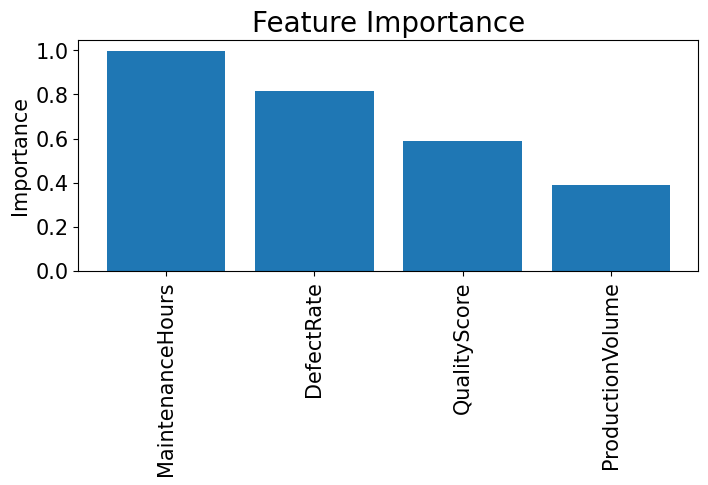

In [22]:
plt.figure(figsize = (8,3))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Importance', fontsize = 15)
plt.title('Feature Importance', fontsize = 20)

In [23]:
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.39      0.79      0.53       102
           1       0.95      0.77      0.85       546

    accuracy                           0.77       648
   macro avg       0.67      0.78      0.69       648
weighted avg       0.86      0.77      0.80       648



In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Training the SVM model using the selected features
svm_model = SVC(kernel='linear',class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Get the feature importance from SVM (absolute coefficients for linear kernel)
svm_feature_importance = np.abs(svm_model.coef_[0])

# Creating a DataFrame to display SVM feature importance
svm_feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': svm_feature_importance
}).sort_values(by='Importance', ascending=False)

print(svm_feature_importance_df)


            Feature  Importance
3  MaintenanceHours    0.930752
1        DefectRate    0.769984
2      QualityScore    0.481371
0  ProductionVolume    0.284271


In [25]:
print("Accuracy: ",accuracy_score(y_test,y_pred_svm))

Accuracy:  0.7854938271604939


Text(0.5, 1.0, 'Feature Importance')

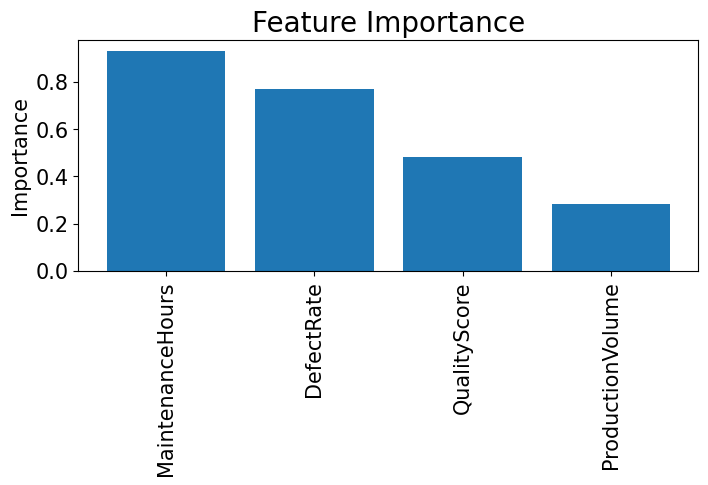

In [26]:
plt.figure(figsize = (8,3))
plt.bar(svm_feature_importance_df['Feature'], svm_feature_importance_df['Importance'])
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Importance', fontsize = 15)
plt.title('Feature Importance', fontsize = 20)

In [27]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.41      0.78      0.54       102
           1       0.95      0.79      0.86       546

    accuracy                           0.79       648
   macro avg       0.68      0.79      0.70       648
weighted avg       0.87      0.79      0.81       648

